In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv(r'F:\Internships\Eleveate Labs\Tasks\1 July\Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Load Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

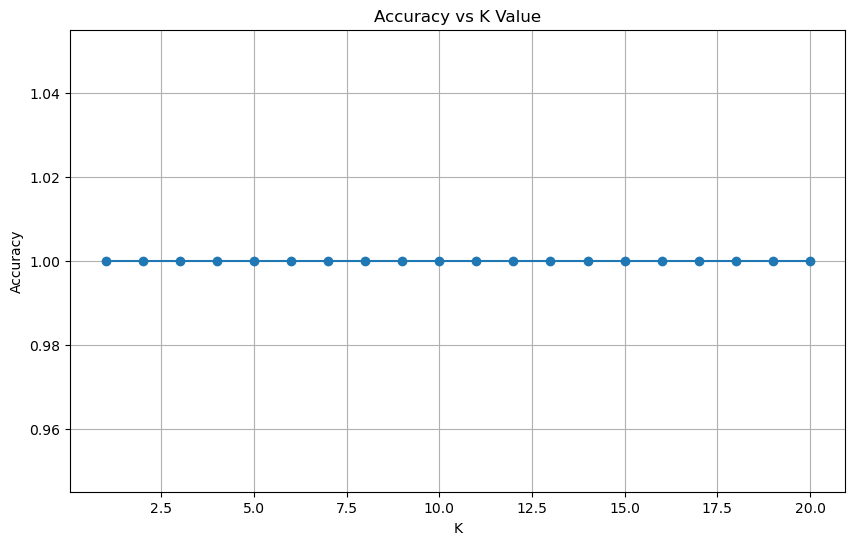

In [9]:
# Try different values of K and record accuracy
accuracies = []
k_range = range(1, 21)

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs K
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o')
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [10]:
# Train and evaluate KNN with best K
best_k = accuracies.index(max(accuracies)) + 1
print(f"Best K = {best_k}")

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))

Best K = 1
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Accuracy: 1.0


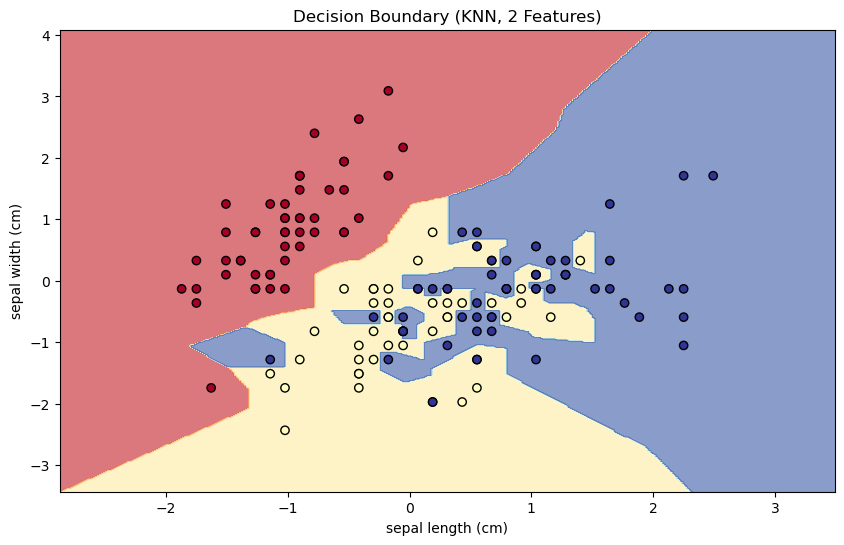

In [11]:
# Reduce to 2D using only first 2 features for plotting
X_vis = iris.data[:, :2]  # Use only first two features
y_vis = iris.target

# Train with full dataset (2 features only)
X_vis = StandardScaler().fit_transform(X_vis)
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_vis, y_vis)

# Create a mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.6)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title("Decision Boundary (KNN, 2 Features)")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()